<a href="https://colab.research.google.com/github/chakshukaushik/GHG_Emission_week3/blob/main/GHG_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

print("✅ All libraries imported successfully.")

✅ All libraries imported successfully.


In [ ]:

df = pd.read_csv("SupplyChainEmission.csv")  # Use your cleaned Week 2 dataset name

# Drop missing target values
df = df.dropna(subset=['Supply Chain Emission Factors with Margins']).reset_index(drop=True)

# Optional Encoding (if these columns exist in your file)
if 'Substance' in df.columns:
    df['Substance'] = df['Substance'].map({'carbon dioxide': 0, 'methane': 1, 'nitrous oxide': 2, 'other GHGs': 3})
if 'Unit' in df.columns:
    df['Unit'] = df['Unit'].map({'kg/2018 USD, purchaser price': 0, 'kg CO2e/2018 USD, purchaser price': 1})

print("✅ Dataset loaded and cleaned.")

✅ Dataset loaded and cleaned.


In [ ]:
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])

# 🧹 Drop or ignore non-numeric columns automatically
X = X.select_dtypes(include=['number'])  # Keep only numeric features

# Fill NaNs
X = X.fillna(0)

# Define target
y = df['Supply Chain Emission Factors with Margins']
y = y.loc[X.index]

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Fixed! Only numeric columns scaled.")

✅ Fixed! Only numeric columns scaled.


In [ ]:
models = {
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)

    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    results.append({
        "Model": name,
        "RMSE": round(rmse, 4),
        "MAE": round(mae, 4),
        "R² Score": round(r2, 4)
    })

results_df = pd.DataFrame(results)
results_df

,Model,RMSE,MAE,R² Score
0,XGBoost,0.1658,0.0313,0.6124
1,Gradient Boosting,0.1665,0.0337,0.6090
2,HistGradientBoosting,0.1974,0.0512,0.4503


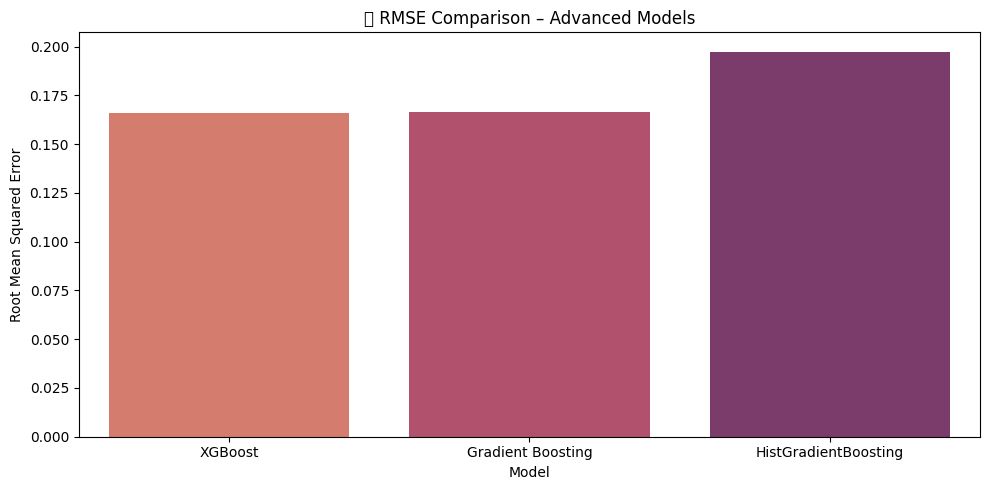

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x='Model', y='RMSE', palette='flare')
plt.title("📊 RMSE Comparison – Advanced Models")
plt.ylabel("Root Mean Squared Error")
plt.tight_layout()
plt.show()

In [ ]:
best_model = XGBRegressor(n_estimators=100, random_state=42)
best_model.fit(X_scaled, y)

import joblib
joblib.dump(best_model, "Week3_XGBoost_Model.pkl")

print("✅ Final model saved as Week3_XGBoost_Model.pkl")

✅ Final model saved as Week3_XGBoost_Model.pkl


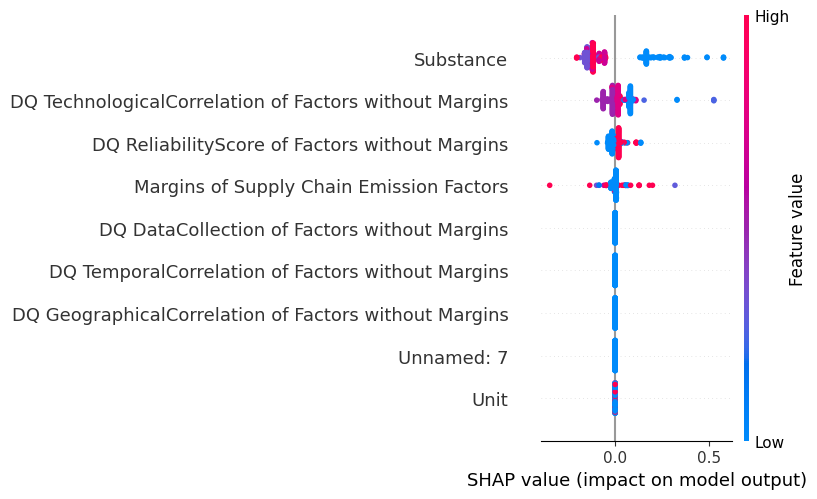

In [ ]:
import shap

# Use TreeExplainer for XGBoost (most compatible)
explainer = shap.Explainer(best_model)
shap_values = explainer(X_scaled)

# Summary plot (feature impact overview)
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

In [ ]:
import joblib
joblib.dump(best_model, "Week3_XGBoost_Model.pkl")
print("✅ Final model saved.")

✅ Final model saved.
